# Packages(导入包)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from model import *
from testCases import *

# Dataset(导入数据集)

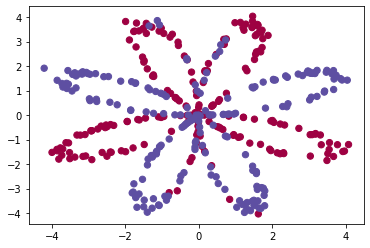

In [2]:
# plot the dataset
X, Y = load_planar_dataset()
plt.scatter(X[0],X[1],c=Y.reshape(400),s=40,cmap=plt.cm.Spectral)
plt.show()

In [3]:
# info of the dataset
print('The shape of X is: ' + str(X.shape))
print('The shape of Y is: ' + str(Y.shape))
print('I have m = %d training examples!' %(X.shape[1]))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


# Simple Logistic Regression(简单的逻辑回归)

In [4]:
# What's the difference between LogisticRegression and LogisticRegressionCV?
##  LogisticRegressionCV, 使用了交叉验证来选择正则化系数C.
##  LogisticRegression需要自己每次指定一个正则化系数。除了交叉验证，以及选择正则化系数C以外， LogisticRegression和LogisticRegressionCV的使用方法基本相同。

/Users/diyanzhang/opt/anaconda3/envs/e4_ezu/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


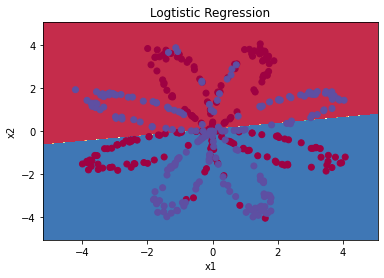

In [5]:
# simple logistic regression with sklearn package
clf = sklearn.linear_model.LogisticRegressionCV().fit(X.T, Y.T)
# plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)

LR_predictions = clf.predict(X.T)

# Neural Network model（神经网络模型）

## Defining the neural network structure

In [6]:
# defining the neural network structure
x_assess, y_assess = layer_sizes_test_case()
n_x, n_h, n_y = layer_size(x_assess, y_assess)
print("the size of the input layer is: %d" %n_x)
print("the size of the hidden layer is: %d" %n_h)
print("the size of the output layer is: %d" %n_y)

the size of the input layer is: 5
the size of the hidden layer is: 4
the size of the output layer is: 2


## Initialize the model's parameters（初始化模型参数）

In [7]:
# initialize the model's parameters
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


##  The Loop

In [8]:
# forward_propagation
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)

# Note: we use the mean here just to make sure that your output matches ours.
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

-0.0004997557777419902 -0.000496963353231779 0.0004381874509591466 0.500109546852431


In [9]:
# compute cost
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.6929198937761266


In [10]:
# backward propagation
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.01018708 -0.00708701]
 [ 0.00873447 -0.0060768 ]
 [-0.00530847  0.00369379]
 [-0.02206365  0.01535126]]
db1 = [[-0.00069728]
 [-0.00060606]
 [ 0.000364  ]
 [ 0.00151207]]
dW2 = [[ 0.00363613  0.03153604  0.01162914 -0.01318316]]
db2 = [[0.06589489]]


In [11]:
# update the parameters
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


## Integrate parts 4.1, 4.2 and 4.3 in nn_model()

In [12]:
# Integrate above parts in nn_model() to build neural network model
X_assess, Y_assess = nn_model_test_case()

parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Cost after iteration 0: 0.692584
Cost after iteration 1000: -inf
Cost after iteration 2000: -inf
Cost after iteration 3000: -inf


/Users/diyanzhang/PycharmProjects/NN_and_DLing_Week3/model.py:145: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1-A2), (1-Y))
/Users/diyanzhang/PycharmProjects/NN_and_DLing_Week3/model.py:108: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-x))


Cost after iteration 4000: -inf
Cost after iteration 5000: -inf
Cost after iteration 6000: -inf
Cost after iteration 7000: -inf
Cost after iteration 8000: -inf
Cost after iteration 9000: -inf
W1 = [[-4.18505331  5.33200551]
 [-7.5380428   1.20755483]
 [-4.19297379  5.32617488]
 [ 7.53799718 -1.20757991]]
b1 = [[ 2.32933991]
 [ 3.81000887]
 [ 2.33010357]
 [-3.81008491]]
W2 = [[-6033.82350122 -6008.14294255 -6033.08772786  6008.07935223]]
b2 = [[-52.67929195]]


## predictions

In [13]:
# predictions
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


Cost after iteration 0: 0.693048
Cost after iteration 1000: 0.288083
Cost after iteration 2000: 0.254385
Cost after iteration 3000: 0.233864
Cost after iteration 4000: 0.226792
Cost after iteration 5000: 0.222644
Cost after iteration 6000: 0.219731
Cost after iteration 7000: 0.217504
Cost after iteration 8000: 0.219473
Cost after iteration 9000: 0.218612


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

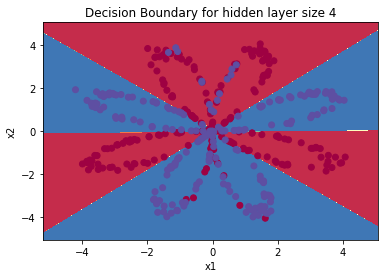

In [14]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, 4, num_iterations=10000, print_cost=True)
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))


## Tuning hidden layer size (optional/ungraded exercise)（调整隐藏层大小）

Cost after iteration 0: 0.693148
Cost after iteration 1000: 0.636621
Cost after iteration 2000: 0.634757
Cost after iteration 3000: 0.633814
Cost after iteration 4000: 0.633205
Cost after iteration 5000: 0.632763
Cost after iteration 6000: 0.632423
Cost after iteration 7000: 0.632148
Cost after iteration 8000: 0.631920
Cost after iteration 9000: 0.631726
Accuracy for 1 hidden units: 67.5 %
Cost after iteration 0: 0.693116
Cost after iteration 1000: 0.582325
Cost after iteration 2000: 0.578948
Cost after iteration 3000: 0.577291
Cost after iteration 4000: 0.576190
Cost after iteration 5000: 0.575353
Cost after iteration 6000: 0.574671
Cost after iteration 7000: 0.574094
Cost after iteration 8000: 0.573594
Cost after iteration 9000: 0.573153
Accuracy for 2 hidden units: 67.25 %
Cost after iteration 0: 0.693114
Cost after iteration 1000: 0.285502
Cost after iteration 2000: 0.273063
Cost after iteration 3000: 0.266367
Cost after iteration 4000: 0.262067
Cost after iteration 5000: 0.259089


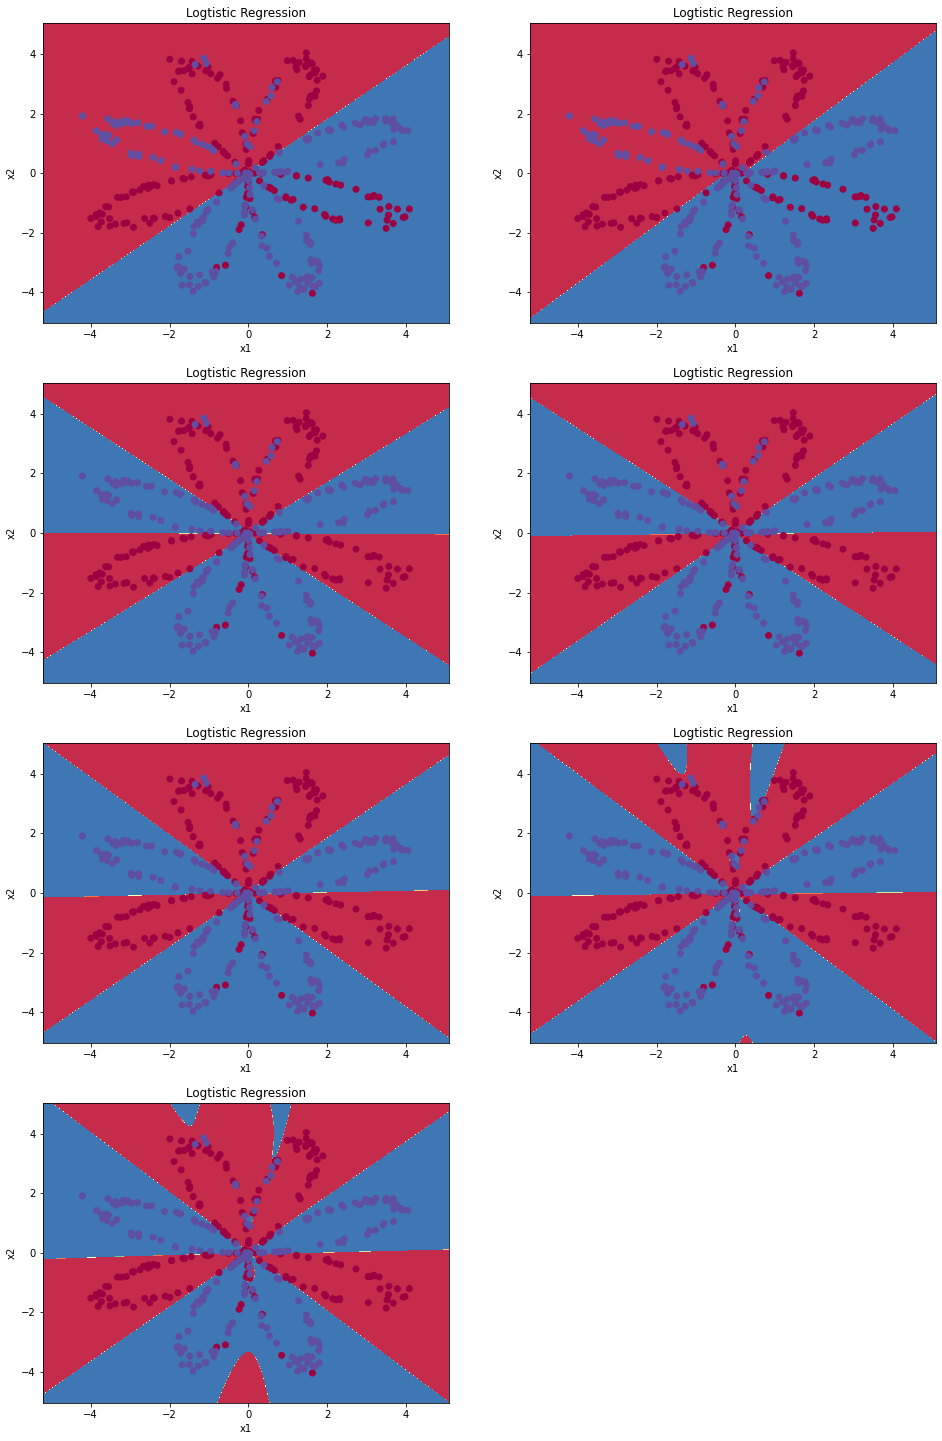

In [15]:
# Tuning hidden layer size (optional/ungraded exercise)
plt.figure(figsize=(16,32))
hidden_layer_sizes = [1,2,3,4,5,20,50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations=5000, print_cost=True)
    # Plot the decision boundary
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y, predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))